In [1]:
!pip install fastai --upgrade --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --use-feature


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.3MB/s 
     |████████████████████████████████| 194kB 21.5MB/s 
     |████████████████████████████████| 1.2MB 37.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [7]:
(path/'training').ls()

(#10) [Path('training/8'),Path('training/0'),Path('training/2'),Path('training/4'),Path('training/5'),Path('training/7'),Path('training/9'),Path('training/3'),Path('training/1'),Path('training/6')]

In [8]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = GrandparentSplitter(train_name='training', valid_name='testing'))

In [9]:
dls = dblock.dataloaders(path)

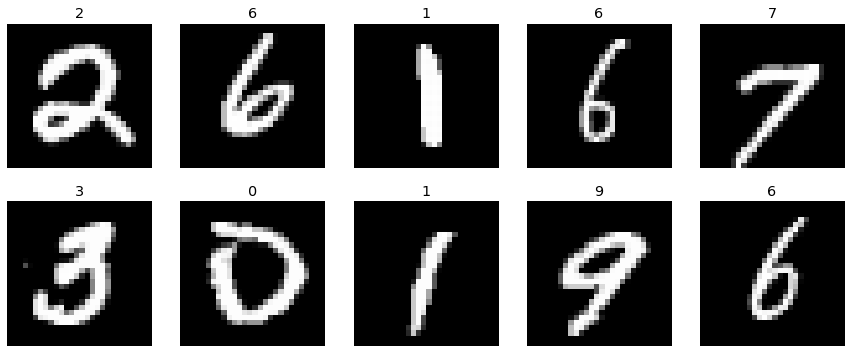

In [10]:
dls.train.show_batch(max_n = 10, nrows=2)

In [11]:
dls.loss_func

FlattenedLoss of CrossEntropyLoss()

In [12]:
learn = cnn_learner(dls, resnet18, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


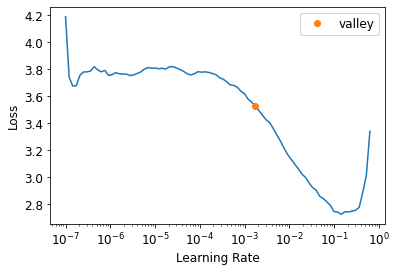

In [13]:
lr_min = learn.lr_find()

In [14]:
lr_min

SuggestedLRs(valley=tensor(0.0017))

In [15]:
learn.fine_tune(3, base_lr= 0.0014)

epoch,train_loss,valid_loss,accuracy,time
0,0.758398,0.525459,0.833100,01:46


epoch,train_loss,valid_loss,accuracy,time
0,0.136218,0.069158,0.978600,01:51
1,0.072485,0.043321,0.986500,01:51
2,0.039761,0.037214,0.988500,01:52


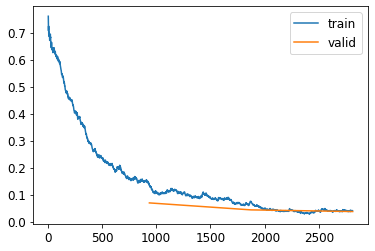

In [16]:
learn.recorder.plot_loss()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

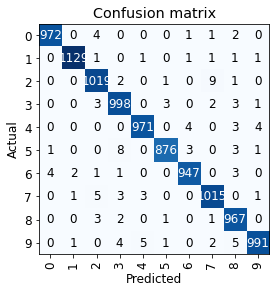

In [18]:
interp.plot_confusion_matrix()

In [19]:
img = get_image_files(path/'testing')

In [20]:
img = img[2000]

In [21]:
img

Path('testing/2/5427.png')

In [22]:
learn.predict(img)

('2',
 tensor(2),
 tensor([8.5927e-05, 1.8617e-05, 9.9971e-01, 7.8877e-06, 1.4733e-05, 1.5522e-06, 6.2903e-05, 1.3067e-05, 7.1125e-05, 1.0310e-05]))

In [118]:
customImage = Image.open('four.jpg')
customImage = customImage.resize((28,28))
customImage


In [119]:
learn.predict(PILImage(customImage))

('2',
 tensor(2),
 tensor([4.8572e-06, 5.4521e-06, 9.8484e-01, 9.3266e-05, 1.1040e-05, 7.6468e-07, 1.1871e-05, 2.0167e-07, 1.5029e-02, 3.0759e-06]))